<h2 align='center'>Emotion Detection</h2>

* Humans 👦 show different emotions/feelings based on the situations and communicate them through facial expressions or in form of words.
* In Social Media like Twitter and Instagram, many people express their views through comments about a particular event/scenario and these comments may address the feelings like sadness, happiness, joy, sarcasm, fear, and many other
* For a given comment/text, we are going to use classical NLP techniques and classify under which emotion that particular comment belongs!
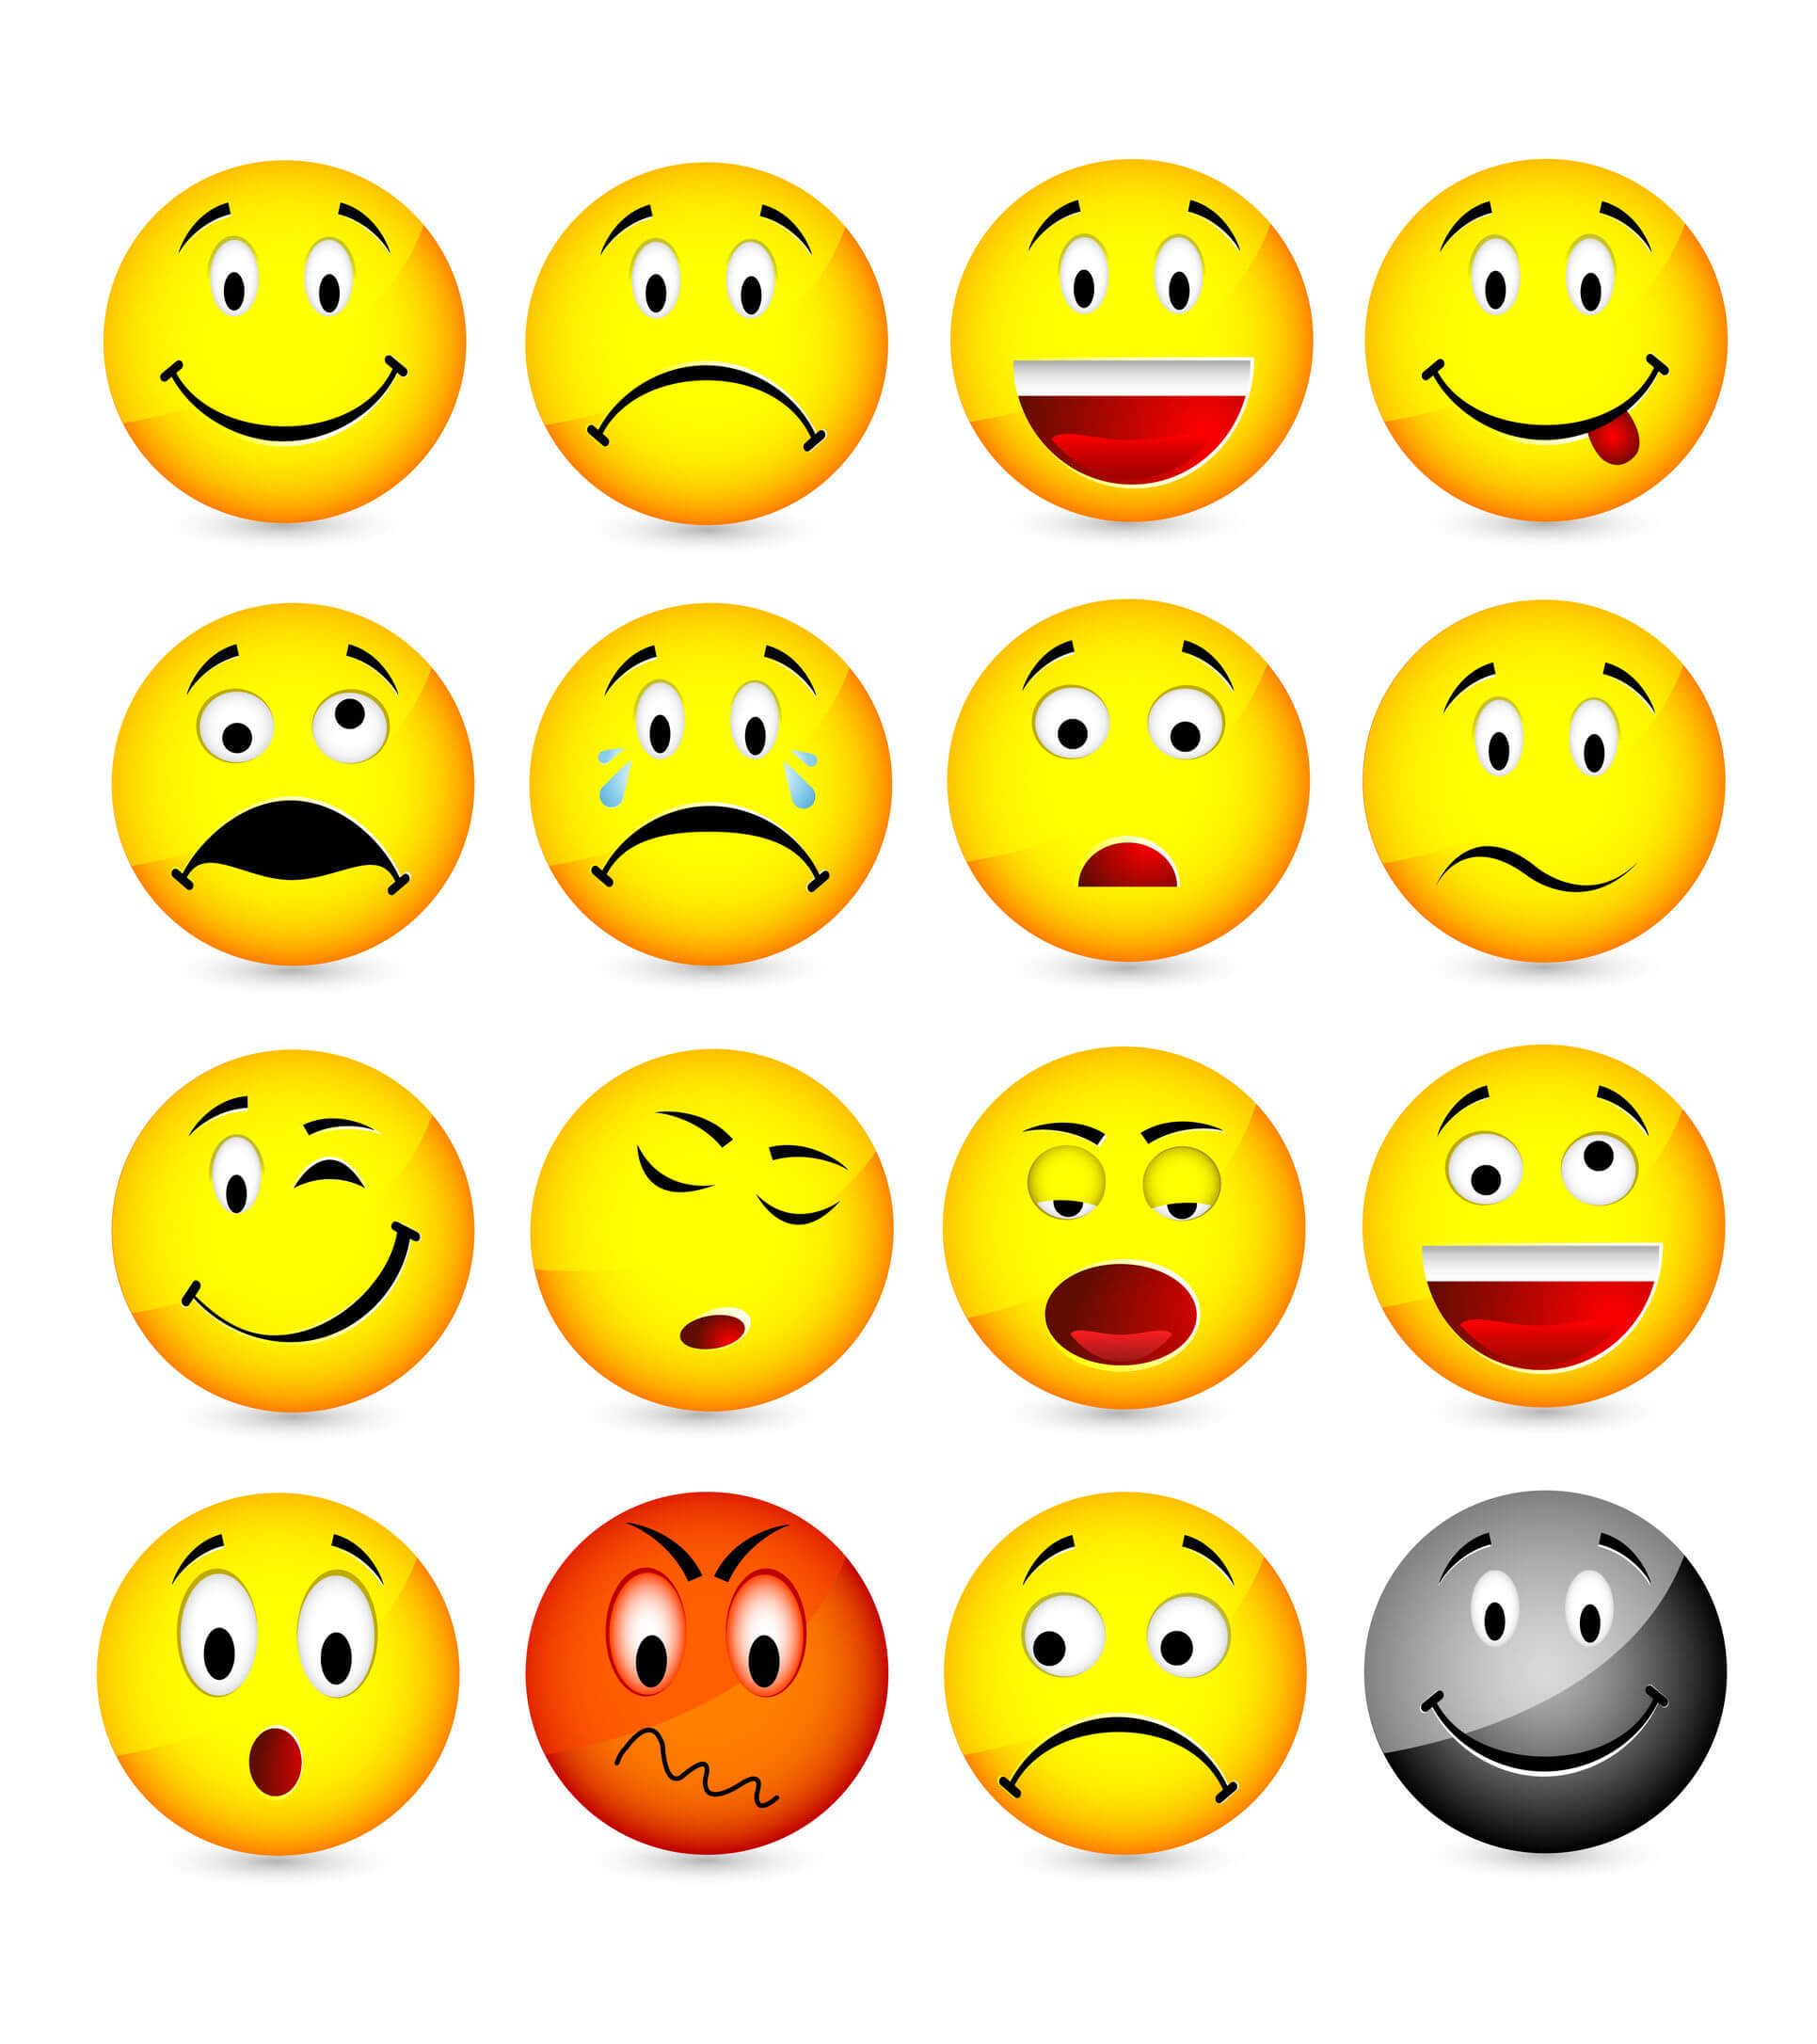


Datset: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp

In [23]:
#import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv("Emotion_classify_Data.csv")
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [7]:
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [9]:
value_counts = pd.Series(df.Emotion.value_counts())
value_counts

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

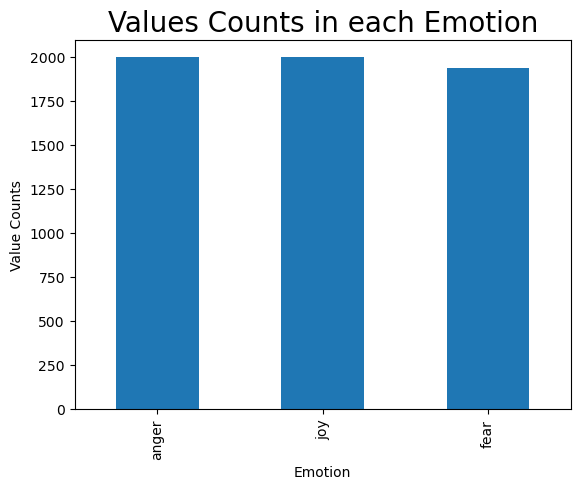

In [10]:
value_counts.plot(kind="bar",  fontsize = 10.00)
plt.xlabel("Emotion", fontsize=10)
plt.ylabel("Value Counts", fontsize=10)
plt.title("Values Counts in each Emotion", fontsize=20 )
plt.show()

The data is almost balanced

In [12]:
df["Emotion"] = df["Emotion"].replace({"anger":0, "joy":1,"fear":2})
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,2
1,im so full of life i feel appalled,0
2,i sit here to write i start to dig out my feel...,2
3,ive been really angry with r and i feel like a...,1
4,i feel suspicious if there is no one outside l...,2


<h2 align='center'>Modelling without Pre-processing Text data</h2>

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df.Comment, df.Emotion, random_state=52, test_size=0.2, stratify=df.Emotion)

In [14]:
print("The Shape of x_train:", x_train.shape)
print("The Shape of x_test:", x_test.shape)
print("The Shape of y_train:", y_train.shape)
print("The Shape of y_test:", y_test.shape)

The Shape of x_train: (4749,)
The Shape of x_test: (1188,)
The Shape of y_train: (4749,)
The Shape of y_test: (1188,)


In [15]:
y_train.value_counts()

Emotion
1    1600
0    1600
2    1549
Name: count, dtype: int64

In [16]:
y_test.value_counts()

Emotion
1    400
0    400
2    388
Name: count, dtype: int64

<h2>Attempt 1: Random Forest</h2>

* Text Converting Method: Countvectorizer (trigram)


In [33]:
#trigram
rf_model = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,3))),
    ("rf", RandomForestClassifier())
])

rf_model.fit(x_train, y_train)

y_predict = rf_model.predict(x_test)

rf_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
rf_f1_score = "{:.4f}".format(f1_score(y_test, y_predict, average='macro'))
rf_precision_score =  "{:.4f}".format(precision_score(y_test, y_predict, average='macro'))
rf_recall_score =  "{:.4f}".format(recall_score(y_test, y_predict, average='macro'))



print("Classifcation report for Random Forest & trigrams:\n", classification_report(y_test, y_predict))

Classifcation report for Random Forest & trigrams:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88       400
           1       0.79      0.97      0.87       400
           2       0.93      0.85      0.89       388

    accuracy                           0.88      1188
   macro avg       0.89      0.88      0.88      1188
weighted avg       0.89      0.88      0.88      1188



In [34]:
model_scores = pd.DataFrame( [["raw", "Random Forest", " ", {"Countvectorizer" :"trigram"}, rf_f1_score, rf_accuracy_score, rf_precision_score, rf_recall_score]],
                              columns= ["Text Type", "Model", "Metrics Used", "Methods Used", "F1 Score", "Accuracy Score", "Precision", "Recall"])
model_scores

,Text Type,Model,Metrics Used,Methods Used,F1 Score,Accuracy Score,Precision,Recall
0,raw,Random Forest,,{'Countvectorizer': 'trigram'},0.8801,0.8796,0.8907,0.8793


In multi-class classification tasks, precision, recall, and F1-score can be calculated using different averaging strategies: macro, micro, and weighted. Each averaging strategy calculates the metric differently, and their choice depends on the specific requirements and characteristics of your dataset.

1. **Macro-average**:
   - Calculate the metric independently for each class.
   - Take the unweighted mean of the precision, recall, or F1-score across all classes.
   - Each class contributes equally to the final score, regardless of class imbalance.

2. **Micro-average**:
   - Aggregate the contributions of all classes to compute the average metric.
   - Compute the metric globally by counting the total true positives, false negatives, and false positives across all classes.
   - Particularly useful when you have class imbalance, as each instance contributes equally to the final score.

3. **Weighted-average**:
   - Calculate the metric for each class.
   - Take the weighted mean of the metric, where each class's score is weighted by its support (the number of true instances).
   - Useful when you have class imbalance and you want to give more importance to metrics from classes with higher support.

Here's a breakdown of their characteristics:

- **Macro-average** treats all classes equally, so it's useful when you want to know the overall performance across different classes without considering class imbalance. However, it might be biased if your classes have imbalanced sizes.

- **Micro-average** treats all instances equally, so it's useful when you want to emphasize the performance of the model on individual instances, especially in the presence of class imbalance.

- **Weighted-average** provides a balance between macro and micro-average by considering both class imbalance and individual instance performance. It's suitable when you want to account for class imbalance while still considering the overall performance across different classes.


<h2>Attempt 2: Multinomial Naive Bayes </h2>

* Text Converting Method: Countvectorizer ( unigram & trigram)

In [35]:
#unigram

nb1_model = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,1))),
    ("nb1", MultinomialNB())
])

nb1_model.fit(x_train, y_train)

y_predict = nb1_model.predict(x_test)

nb1_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
nb1_f1_score = "{:.4f}".format(f1_score(y_test, y_predict, average='macro'))
nb1_precision_score =  "{:.4f}".format(precision_score(y_test, y_predict, average='macro'))
nb1_recall_score =  "{:.4f}".format(recall_score(y_test, y_predict, average='macro'))



print("Classifcation report for Random Forest & trigrams:\n", classification_report(y_test, y_predict))

Classifcation report for Random Forest & trigrams:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       400
           1       0.91      0.85      0.88       400
           2       0.88      0.88      0.88       388

    accuracy                           0.88      1188
   macro avg       0.88      0.88      0.88      1188
weighted avg       0.88      0.88      0.88      1188



In [42]:
new_details =pd.DataFrame( {
    "Text Type": "raw",
    "Model": "Multinomial Naive Bayes",
    "Metrics Used": " ",
    "Methods Used": [{"Countvectorizer" :"unigram"}],
    "F1 Score": nb1_f1_score,
    "Accuracy Score": nb1_accuracy_score,
    "Precision": nb1_precision_score,
    "Recall": nb1_recall_score
})
model_scores = pd.concat([model_scores, new_details], ignore_index=True)
model_scores

,Text Type,Model,Metrics Used,Methods Used,F1 Score,Accuracy Score,Precision,Recall
0,raw,Random Forest,,{'Countvectorizer': 'trigram'},0.8801,0.8796,0.8907,0.8793
1,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'unigram'},0.8789,0.8788,0.8803,0.8788


In [37]:
#tri

nb2_model = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,3))),
    ("nb1", MultinomialNB())
])

nb2_model.fit(x_train, y_train)

y_predict = nb2_model.predict(x_test)

nb2_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
nb2_f1_score = "{:.4f}".format(f1_score(y_test, y_predict, average='macro'))
nb2_precision_score =  "{:.4f}".format(precision_score(y_test, y_predict, average='macro'))
nb2_recall_score =  "{:.4f}".format(recall_score(y_test, y_predict, average='macro'))



print("Classifcation report for Multinomial Naive Bayes	& trigrams:\n", classification_report(y_test, y_predict))

Classifcation report for Multinomial Naive Bayes	& trigrams:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       400
           1       0.84      0.84      0.84       400
           2       0.84      0.82      0.83       388

    accuracy                           0.84      1188
   macro avg       0.84      0.84      0.84      1188
weighted avg       0.84      0.84      0.84      1188



In [43]:
new_details =pd.DataFrame( {
    "Text Type": "raw",
    "Model": "Multinomial Naive Bayes",
    "Metrics Used": " ",
    "Methods Used": [{"Countvectorizer" :"trigram"}],
    "F1 Score": nb2_f1_score,
    "Accuracy Score": nb2_accuracy_score,
    "Precision": nb2_precision_score,
    "Recall": nb2_recall_score
})
model_scores = pd.concat([model_scores, new_details], ignore_index=True)
model_scores

,Text Type,Model,Metrics Used,Methods Used,F1 Score,Accuracy Score,Precision,Recall
0,raw,Random Forest,,{'Countvectorizer': 'trigram'},0.8801,0.8796,0.8907,0.8793
1,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'unigram'},0.8789,0.8788,0.8803,0.8788
2,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'trigram'},0.8408,0.8409,0.8409,0.8407


<h2>Attempt 3: Random Forest </h2>

* Text Converting Method: TF-IDF

In [45]:
#trigram
rf1_model = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ("rf", RandomForestClassifier())
])

rf1_model.fit(x_train, y_train)

y_predict = rf1_model.predict(x_test)

rf1_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
rf1_f1_score = "{:.4f}".format(f1_score(y_test, y_predict, average='macro'))
rf1_precision_score =  "{:.4f}".format(precision_score(y_test, y_predict, average='macro'))
rf1_recall_score =  "{:.4f}".format(recall_score(y_test, y_predict, average='macro'))



print("Classifcation report for Random Forest & TFIDF:\n", classification_report(y_test, y_predict))

Classifcation report for Random Forest & TFIDF:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       400
           1       0.87      0.95      0.91       400
           2       0.93      0.92      0.92       388

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188



In [46]:
new_details =pd.DataFrame( {
    "Text Type": "raw",
    "Model": "Random Forest",
    "Metrics Used": " ",
    "Methods Used": ["TFIDF"],
    "F1 Score": rf1_f1_score,
    "Accuracy Score": rf1_accuracy_score,
    "Precision": rf1_precision_score,
    "Recall": rf1_recall_score
})
model_scores = pd.concat([model_scores, new_details], ignore_index=True)
model_scores

,Text Type,Model,Metrics Used,Methods Used,F1 Score,Accuracy Score,Precision,Recall
0,raw,Random Forest,,{'Countvectorizer': 'trigram'},0.8801,0.8796,0.8907,0.8793
1,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'unigram'},0.8789,0.8788,0.8803,0.8788
2,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'trigram'},0.8408,0.8409,0.8409,0.8407
3,raw,Random Forest,,TFIDF,0.9099,0.9099,0.9118,0.9100


<h2>Attempt 4:  Multinomial Naive Bayes </h2>

* Text Converting Method: TF-IDF

In [47]:
#tfidf - nb
nb3_model = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ("rf", MultinomialNB())
])

nb3_model.fit(x_train, y_train)

y_predict = nb3_model.predict(x_test)

nb3_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
nb3_f1_score = "{:.4f}".format(f1_score(y_test, y_predict, average='macro'))
nb3_precision_score =  "{:.4f}".format(precision_score(y_test, y_predict, average='macro'))
nb3_recall_score =  "{:.4f}".format(recall_score(y_test, y_predict, average='macro'))



print("Classifcation report for Multinomial Naive Bayes  & TFIDF:\n", classification_report(y_test, y_predict))

Classifcation report for Multinomial Naive Bayes  & TFIDF:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       400
           1       0.90      0.88      0.89       400
           2       0.90      0.88      0.89       388

    accuracy                           0.89      1188
   macro avg       0.89      0.89      0.89      1188
weighted avg       0.89      0.89      0.89      1188



In [48]:
new_details =pd.DataFrame( {
    "Text Type": "raw",
    "Model": "Multinomial Naive Bayes",
    "Metrics Used": " ",
    "Methods Used": ["TFIDF"],
    "F1 Score": nb3_f1_score,
    "Accuracy Score": nb3_accuracy_score,
    "Precision": nb3_precision_score,
    "Recall": nb3_recall_score
})
model_scores = pd.concat([model_scores, new_details], ignore_index=True)
model_scores

,Text Type,Model,Metrics Used,Methods Used,F1 Score,Accuracy Score,Precision,Recall
0,raw,Random Forest,,{'Countvectorizer': 'trigram'},0.8801,0.8796,0.8907,0.8793
1,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'unigram'},0.8789,0.8788,0.8803,0.8788
2,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'trigram'},0.8408,0.8409,0.8409,0.8407
3,raw,Random Forest,,TFIDF,0.9099,0.9099,0.9118,0.9100
4,raw,Multinomial Naive Bayes,,TFIDF,0.8897,0.8897,0.8907,0.8896


<h2>Use text pre-processing to remove stop words, punctuations and apply lemmatization</h2>

In [49]:
# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 


#use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [50]:
#create column for filtered text

df["preprocessed_comment"] = df.Comment.apply(preprocess)
df.head()

,Comment,Emotion,preprocessed_comment
0,i seriously hate one subject to death but now ...,2,seriously hate subject death feel reluctant drop
1,im so full of life i feel appalled,0,m life feel appalled
2,i sit here to write i start to dig out my feel...,2,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,1,ve angry r feel like idiot trust place
4,i feel suspicious if there is no one outside l...,2,feel suspicious outside like rapture happen


In [51]:
# Train trst split

x_train, x_test, y_train, y_test = train_test_split(df.preprocessed_comment, df.Emotion, random_state=52, test_size=0.2, stratify=df.Emotion)

In [53]:
y_train.value_counts()

Emotion
1    1600
0    1600
2    1549
Name: count, dtype: int64

<h2>Build a model with pre processed text</h2>

<h2>Attempt 5: Random Forest</h2>

* Text Converting Method: Countvectorizer (trigram)


In [55]:
#trigram
rf2_model = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,3))),
    ("rf", RandomForestClassifier())
])

rf2_model.fit(x_train, y_train)

y_predict = rf2_model.predict(x_test)

rf2_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
rf2_f1_score = "{:.4f}".format(f1_score(y_test, y_predict, average='macro'))
rf2_precision_score =  "{:.4f}".format(precision_score(y_test, y_predict, average='macro'))
rf2_recall_score =  "{:.4f}".format(recall_score(y_test, y_predict, average='macro'))



print("Classifcation report for Random Forest & trigrams:\n", classification_report(y_test, y_predict))

Classifcation report for Random Forest & trigrams:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       400
           1       0.89      0.96      0.92       400
           2       0.96      0.90      0.93       388

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188



In [56]:
new_details =pd.DataFrame( {
    "Text Type": "pre processed",
    "Model": "Random Forest",
    "Metrics Used": " ",
    "Methods Used": [{'Countvectorizer': 'trigram'}],
    "F1 Score": rf2_f1_score,
    "Accuracy Score": rf2_accuracy_score,
    "Precision": rf2_precision_score,
    "Recall": rf2_recall_score
})
model_scores = pd.concat([model_scores, new_details], ignore_index=True)
model_scores

,Text Type,Model,Metrics Used,Methods Used,F1 Score,Accuracy Score,Precision,Recall
0,raw,Random Forest,,{'Countvectorizer': 'trigram'},0.8801,0.8796,0.8907,0.8793
1,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'unigram'},0.8789,0.8788,0.8803,0.8788
2,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'trigram'},0.8408,0.8409,0.8409,0.8407
3,raw,Random Forest,,TFIDF,0.9099,0.9099,0.9118,0.9100
4,raw,Multinomial Naive Bayes,,TFIDF,0.8897,0.8897,0.8907,0.8896
5,pre processed,Random Forest,,{'Countvectorizer': 'trigram'},0.9226,0.9226,0.9246,0.9223


<h2>Attempt 6: Random Forest</h2>

* Text Converting Method: TfidfVectorizer 

In [58]:

#trigram
rf3_model = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ("rf", RandomForestClassifier())
])

rf3_model.fit(x_train, y_train)

y_predict = rf3_model.predict(x_test)

rf3_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
rf3_f1_score = "{:.4f}".format(f1_score(y_test, y_predict, average='macro'))
rf3_precision_score =  "{:.4f}".format(precision_score(y_test, y_predict, average='macro'))
rf3_recall_score =  "{:.4f}".format(recall_score(y_test, y_predict, average='macro'))



print("Classifcation report for Random Forest & TF-IDF:\n", classification_report(y_test, y_predict))

Classifcation report for Random Forest & TF-IDF:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91       400
           1       0.90      0.95      0.92       400
           2       0.92      0.93      0.92       388

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188



In [59]:
new_details =pd.DataFrame( {
    "Text Type": "pre processed",
    "Model": "Random Forest",
    "Metrics Used": " ",
    "Methods Used": ["TF-IDF"],
    "F1 Score": rf3_f1_score,
    "Accuracy Score": rf3_accuracy_score,
    "Precision": rf3_precision_score,
    "Recall": rf3_recall_score
})
model_scores = pd.concat([model_scores, new_details], ignore_index=True)
model_scores

,Text Type,Model,Metrics Used,Methods Used,F1 Score,Accuracy Score,Precision,Recall
0,raw,Random Forest,,{'Countvectorizer': 'trigram'},0.8801,0.8796,0.8907,0.8793
1,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'unigram'},0.8789,0.8788,0.8803,0.8788
2,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'trigram'},0.8408,0.8409,0.8409,0.8407
3,raw,Random Forest,,TFIDF,0.9099,0.9099,0.9118,0.9100
4,raw,Multinomial Naive Bayes,,TFIDF,0.8897,0.8897,0.8907,0.8896
5,pre processed,Random Forest,,{'Countvectorizer': 'trigram'},0.9226,0.9226,0.9246,0.9223
6,pre processed,Random Forest,,TF-IDF,0.9182,0.9184,0.9195,0.9185


<h2>Attempt 7: Multinomial Naive Bayes </h2>

* Text Converting Method: Countvectorizer ( unigram & trigram)

In [60]:
#unigram

nb4_model = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,1))),
    ("nb1", MultinomialNB())
])

nb4_model.fit(x_train, y_train)

y_predict = nb4_model.predict(x_test)

nb4_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
nb4_f1_score = "{:.4f}".format(f1_score(y_test, y_predict, average='macro'))
nb4_precision_score =  "{:.4f}".format(precision_score(y_test, y_predict, average='macro'))
nb4_recall_score =  "{:.4f}".format(recall_score(y_test, y_predict, average='macro'))



print("Classifcation report for Multinomial Naive Baye & unigram:\n", classification_report(y_test, y_predict))

Classifcation report for Multinomial Naive Baye & unigram:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       400
           1       0.92      0.89      0.91       400
           2       0.88      0.88      0.88       388

    accuracy                           0.89      1188
   macro avg       0.89      0.89      0.89      1188
weighted avg       0.89      0.89      0.89      1188



In [61]:
new_details =pd.DataFrame( {
    "Text Type": "pre processed",
    "Model": "Multinomial Naive Bayes",
    "Metrics Used": " ",
    "Methods Used": [{"Countvectorizer" :"unigram"}],
    "F1 Score": nb4_f1_score,
    "Accuracy Score": nb4_accuracy_score,
    "Precision": nb4_precision_score,
    "Recall": nb4_recall_score
})
model_scores = pd.concat([model_scores, new_details], ignore_index=True)
model_scores

,Text Type,Model,Metrics Used,Methods Used,F1 Score,Accuracy Score,Precision,Recall
0,raw,Random Forest,,{'Countvectorizer': 'trigram'},0.8801,0.8796,0.8907,0.8793
1,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'unigram'},0.8789,0.8788,0.8803,0.8788
2,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'trigram'},0.8408,0.8409,0.8409,0.8407
3,raw,Random Forest,,TFIDF,0.9099,0.9099,0.9118,0.9100
4,raw,Multinomial Naive Bayes,,TFIDF,0.8897,0.8897,0.8907,0.8896
5,pre processed,Random Forest,,{'Countvectorizer': 'trigram'},0.9226,0.9226,0.9246,0.9223
6,pre processed,Random Forest,,TF-IDF,0.9182,0.9184,0.9195,0.9185
7,pre processed,Multinomial Naive Bayes,,{'Countvectorizer': 'unigram'},0.8906,0.8906,0.8910,0.8905


In [62]:
#trigram

nb5_model = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,3))),
    ("nb1", MultinomialNB())
])

nb5_model.fit(x_train, y_train)

y_predict = nb5_model.predict(x_test)

nb5_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
nb5_f1_score = "{:.4f}".format(f1_score(y_test, y_predict, average='macro'))
nb5_precision_score =  "{:.4f}".format(precision_score(y_test, y_predict, average='macro'))
nb5_recall_score =  "{:.4f}".format(recall_score(y_test, y_predict, average='macro'))



print("Classifcation report for Multinomial Naive Baye & unigram:\n", classification_report(y_test, y_predict))

Classifcation report for Multinomial Naive Baye & unigram:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       400
           1       0.95      0.91      0.93       400
           2       0.89      0.94      0.91       388

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188



In [67]:
new_details =pd.DataFrame( {
    "Text Type": "pre processed",
    "Model": "Multinomial Naive Bayes",
    "Metrics Used": " ",
    "Methods Used": [{"Countvectorizer" :"trigram"}],
    "F1 Score": nb5_f1_score,
    "Accuracy Score": nb5_accuracy_score,
    "Precision": nb5_precision_score,
    "Recall": nb5_recall_score
})
model_scores = pd.concat([model_scores, new_details], ignore_index=True)
model_scores

,Text Type,Model,Metrics Used,Methods Used,F1 Score,Accuracy Score,Precision,Recall
0,raw,Random Forest,,{'Countvectorizer': 'trigram'},0.8801,0.8796,0.8907,0.8793
1,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'unigram'},0.8789,0.8788,0.8803,0.8788
2,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'trigram'},0.8408,0.8409,0.8409,0.8407
3,raw,Random Forest,,TFIDF,0.9099,0.9099,0.9118,0.9100
4,raw,Multinomial Naive Bayes,,TFIDF,0.8897,0.8897,0.8907,0.8896
5,pre processed,Random Forest,,{'Countvectorizer': 'trigram'},0.9226,0.9226,0.9246,0.9223
6,pre processed,Random Forest,,TF-IDF,0.9182,0.9184,0.9195,0.9185
7,pre processed,Multinomial Naive Bayes,,{'Countvectorizer': 'unigram'},0.8906,0.8906,0.8910,0.8905
8,pre processed,Multinomial Naive Bayes,,{'Countvectorizer': 'trigram'},0.9184,0.9184,0.9190,0.9185


<h2>Attempt 7: Multinomial Naive Bayes </h2>

* Text Converting Method: TF-IDF

In [64]:
#TF-IDF

nb6_model = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ("nb1", MultinomialNB())
])

nb6_model.fit(x_train, y_train)

y_predict = nb6_model.predict(x_test)

nb6_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
nb6_f1_score = "{:.4f}".format(f1_score(y_test, y_predict, average='macro'))
nb6_precision_score =  "{:.4f}".format(precision_score(y_test, y_predict, average='macro'))
nb6_recall_score =  "{:.4f}".format(recall_score(y_test, y_predict, average='macro'))



print("Classifcation report for Multinomial Naive Baye & unigram:\n", classification_report(y_test, y_predict))

Classifcation report for Multinomial Naive Baye & unigram:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       400
           1       0.92      0.91      0.91       400
           2       0.89      0.87      0.88       388

    accuracy                           0.90      1188
   macro avg       0.90      0.90      0.90      1188
weighted avg       0.90      0.90      0.90      1188



In [68]:
new_details =pd.DataFrame( {
    "Text Type": "pre processed",
    "Model": "Multinomial Naive Bayes",
    "Metrics Used": " ",
    "Methods Used": ["TF-IDF"],
    "F1 Score": nb6_f1_score,
    "Accuracy Score": nb6_accuracy_score,
    "Precision": nb6_precision_score,
    "Recall": nb6_recall_score
})
model_scores = pd.concat([model_scores, new_details], ignore_index=True)
model_scores

,Text Type,Model,Metrics Used,Methods Used,F1 Score,Accuracy Score,Precision,Recall
0,raw,Random Forest,,{'Countvectorizer': 'trigram'},0.8801,0.8796,0.8907,0.8793
1,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'unigram'},0.8789,0.8788,0.8803,0.8788
2,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'trigram'},0.8408,0.8409,0.8409,0.8407
3,raw,Random Forest,,TFIDF,0.9099,0.9099,0.9118,0.9100
4,raw,Multinomial Naive Bayes,,TFIDF,0.8897,0.8897,0.8907,0.8896
5,pre processed,Random Forest,,{'Countvectorizer': 'trigram'},0.9226,0.9226,0.9246,0.9223
6,pre processed,Random Forest,,TF-IDF,0.9182,0.9184,0.9195,0.9185
7,pre processed,Multinomial Naive Bayes,,{'Countvectorizer': 'unigram'},0.8906,0.8906,0.8910,0.8905
8,pre processed,Multinomial Naive Bayes,,{'Countvectorizer': 'trigram'},0.9184,0.9184,0.9190,0.9185
9,pre processed,Multinomial Naive Bayes,,TF-IDF,0.8963,0.8965,0.8967,0.8962


In [71]:
model_scores.sort_values(by="F1 Score", ascending=False, ignore_index=True)

,Text Type,Model,Metrics Used,Methods Used,F1 Score,Accuracy Score,Precision,Recall
0,pre processed,Random Forest,,{'Countvectorizer': 'trigram'},0.9226,0.9226,0.9246,0.9223
1,pre processed,Multinomial Naive Bayes,,{'Countvectorizer': 'trigram'},0.9184,0.9184,0.9190,0.9185
2,pre processed,Random Forest,,TF-IDF,0.9182,0.9184,0.9195,0.9185
3,raw,Random Forest,,TFIDF,0.9099,0.9099,0.9118,0.9100
4,pre processed,Multinomial Naive Bayes,,TF-IDF,0.8963,0.8965,0.8967,0.8962
5,pre processed,Multinomial Naive Bayes,,{'Countvectorizer': 'unigram'},0.8906,0.8906,0.8910,0.8905
6,raw,Multinomial Naive Bayes,,TFIDF,0.8897,0.8897,0.8907,0.8896
7,raw,Random Forest,,{'Countvectorizer': 'trigram'},0.8801,0.8796,0.8907,0.8793
8,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'unigram'},0.8789,0.8788,0.8803,0.8788
9,raw,Multinomial Naive Bayes,,{'Countvectorizer': 'trigram'},0.8408,0.8409,0.8409,0.8407


<h2>Conclusion:</h2>

* Compare to raw data , preprocessed giving the best results in all metrics.
* Random Forest with BOW giving best results.

**Key Findings:**
* As the n_gram range keeps increasing, there's drastic fall of improvement in performance metrics.
* There's seen a significant improvement in results before pre-processing and after pre-processing the data.
* TF-IDF and Bag of words both performed equally well in performance metrics like Recall and F1-score.
* Random Forest performed quite well when compared to Multinomial Naive Bayes.